#Loading the datasets

In [1]:
#First, load the datasets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%cd ..\Data

data_global = pd.read_excel("depression_anxiety_data.xlsx")
data_countries = pd.read_excel("depression_anxiety_data_countries.xlsx")
data_internet = pd.read_excel("share_of_individuals_using_the_internet.xlsx")
data_social_media = pd.read_excel("social_media_2012_2014.xlsx")
us_data = pd.read_excel("US_data.xlsx", sheet_name= None)

#remove irrelevant columns and rows
data_global = data_global.drop("sex",axis=1)
data_countries = data_countries.drop("sex",axis=1)
#us_data = (us_data[0:20])

c:\Users\sama1\Downloads\fuckoff\DATA\Data-Science-Individual-Project-DATA-6150-01\Data


#Global Depression and Anxiety vs Internet Usage

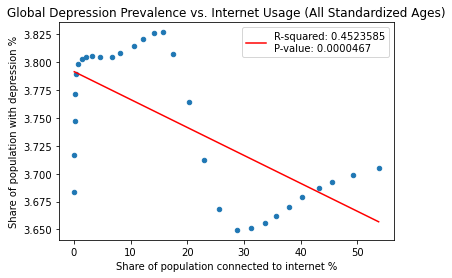

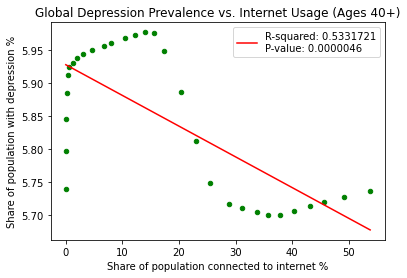

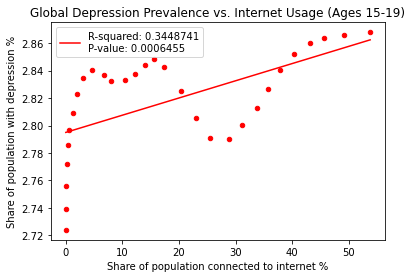

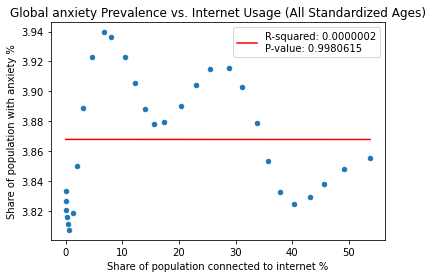

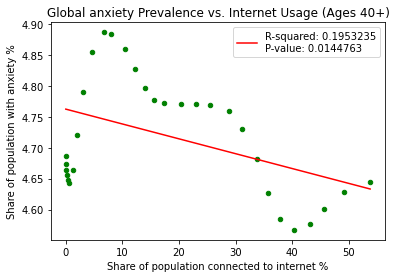

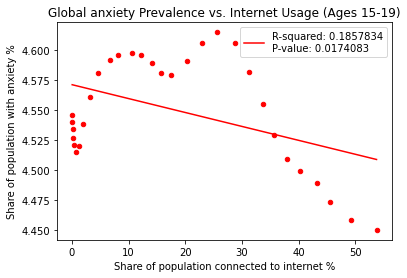

In [2]:
#define filters for use with data_global
age_youth = data_global["age"] == "<20 years"
age_all = data_global["age"] == "Age-standardized"
age_10_14 = data_global["age"] == "10-14 years"
age_15_19 = data_global["age"] == "15-19 years"
age_20_24 = data_global["age"] == "20-24 years"
age_25_29 = data_global["age"] == "25-29 years"
age_30_34 = data_global["age"] == "30-34 years"
age_35_39 = data_global["age"] == "35-39 years"
age_40_44 = data_global["age"] == "40-44 years"
age_45_49 = data_global["age"] == "45-49 years"
age_50_69 = data_global["age"] == "50-69 years"
age_70_plus = data_global["age"] == "70+ years"
#age 40-70+
age_old = age_40_44 | age_45_49 | age_50_69 | age_70_plus
non_covid = (data_global["year"] != 2020) & (data_global["year"] != 2021)

#first, let's plot global prevalence and internet usage, for both all ages and the youth
combined_all = pd.merge(data_global[age_all & non_covid], data_internet, on=["location","year"])
combined_youth = pd.merge(data_global[age_youth & non_covid], data_internet, on=["location","year"])
combined_15_19 = pd.merge(data_global[age_15_19 & non_covid], data_internet, on=["location","year"])
combined_old = pd.merge(data_global[age_old & non_covid], data_internet, on=["location","year"])

combined_old = combined_old.groupby(["location","year", "internet %"])[["depression %","anxiety %"]].mean().reset_index()

#Function to create a linear regression model and plot it
def plot_linear_model(x,y):
  result = stats.linregress(x, y)
  slope = result.slope
  intercept = result.intercept
  y_pred = slope * x + intercept
  r_squared = "{:.7f}".format( result.rvalue ** 2 )
  p_value = "{:.7f}".format(result.pvalue)
  plt.plot(x, y_pred, color='red', label = "R-squared: " + str(r_squared) + "\nP-value: " + str(p_value))

##########################DEPRESSION##########################
#plot all ages
combined_all.plot.scatter(x='internet %',y='depression %')
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (All Standardized Ages)")

#fit models
x = combined_all["internet %"]
y = combined_all["depression %"]
plot_linear_model(x,y)
plt.legend()
plt.show()

#plot old (ages 40-70+)
combined_old.plot.scatter(x='internet %',y='depression %', color="green")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (Ages 40+)")

#fit models
x = combined_old["internet %"]
y = combined_old["depression %"]
plot_linear_model(x,y)
plt.legend()
plt.show()

#plot teenagers (ages 15-19)
combined_15_19.plot.scatter(x='internet %',y='depression %', color="red")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Global Depression Prevalence vs. Internet Usage (Ages 15-19)")

#fit models
x = combined_15_19["internet %"]
y = combined_15_19["depression %"]
plot_linear_model(x,y)
plt.legend()
plt.show()

##########################ANXIETY##########################
#plot all ages
combined_all.plot.scatter(x='internet %',y='anxiety %')
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (All Standardized Ages)")

#fit models
x = combined_all["internet %"]
y = combined_all["anxiety %"]
plot_linear_model(x,y)
plt.legend()
plt.show()

#plot old (ages 40-70+)
combined_old.plot.scatter(x='internet %',y='anxiety %', color="green")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (Ages 40+)")

#fit models
x = combined_old["internet %"]
y = combined_old["anxiety %"]
plot_linear_model(x,y)
plt.legend()
plt.show()

#plot teenagers (ages 15-19)
combined_15_19.plot.scatter(x='internet %',y='anxiety %', color="red")
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Global anxiety Prevalence vs. Internet Usage (Ages 15-19)")

#fit models
x = combined_15_19["internet %"]
y = combined_15_19["anxiety %"]
plot_linear_model(x,y)
plt.legend()
plt.show()



#Global Depression and Anxiety vs Average Social Media Minutes Consumed  

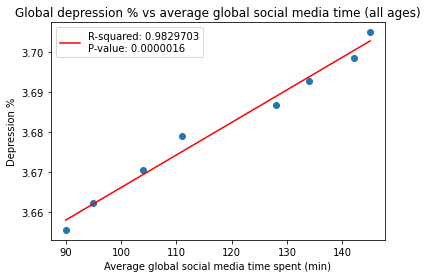

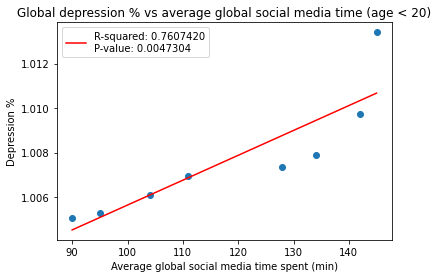

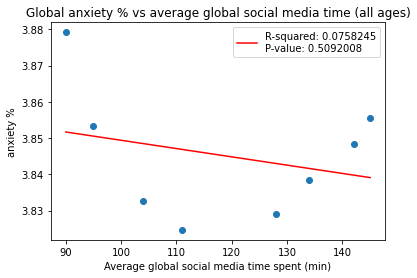

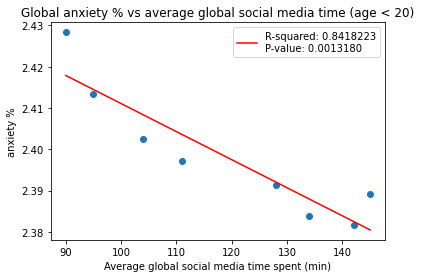

In [3]:
combined_all["year"]=pd.to_numeric(combined_all["year"])
#social media data only covers 2019 to 2024

social_media_all = (pd.merge(combined_all, data_social_media, on=["year"]))
social_media_youth = (pd.merge(combined_youth, data_social_media, on=["year"]))

###############DEPRESSION###############
x=social_media_all ["avg daily time spent globally (min)"]
y=social_media_all["depression %"]

plt.scatter(x,y)
plot_linear_model(x,y)

plt.title("Global depression % vs average global social media time (all ages)")

plt.xlabel("Average global social media time spent (min)")
plt.ylabel("Depression %")
plt.legend()
plt.show()

x=social_media_youth ["avg daily time spent globally (min)"]
y=social_media_youth["depression %"]

plt.scatter(x,y)
plot_linear_model(x,y)

plt.title("Global depression % vs average global social media time (age < 20)")

plt.xlabel("Average global social media time spent (min)")
plt.ylabel("Depression %")
plt.legend()
plt.show()


###############ANXIETY###############
x=social_media_all ["avg daily time spent globally (min)"]
y=social_media_all["anxiety %"]

plt.scatter(x,y)
plot_linear_model(x,y)

plt.title("Global anxiety % vs average global social media time (all ages)")

plt.xlabel("Average global social media time spent (min)")
plt.ylabel("anxiety %")
plt.legend()
plt.show()

x=social_media_youth ["avg daily time spent globally (min)"]
y=social_media_youth["anxiety %"]

plt.scatter(x,y)
plot_linear_model(x,y)

plt.title("Global anxiety % vs average global social media time (age < 20)")

plt.xlabel("Average global social media time spent (min)")
plt.ylabel("anxiety %")
plt.legend()
plt.show()


#Depression and Anxiety vs Internet Usage by Country

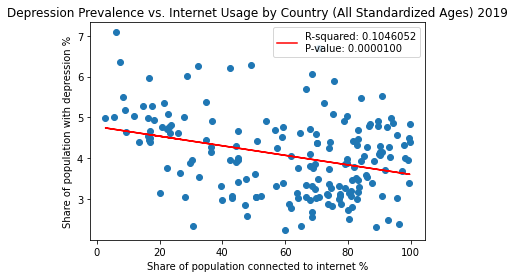

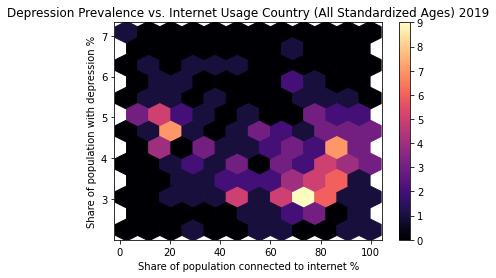

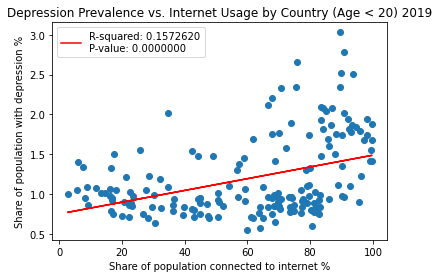

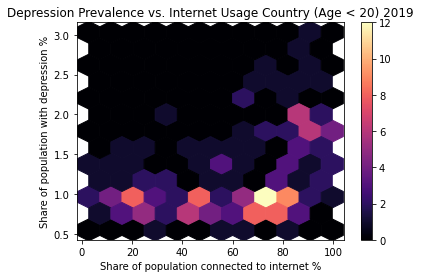

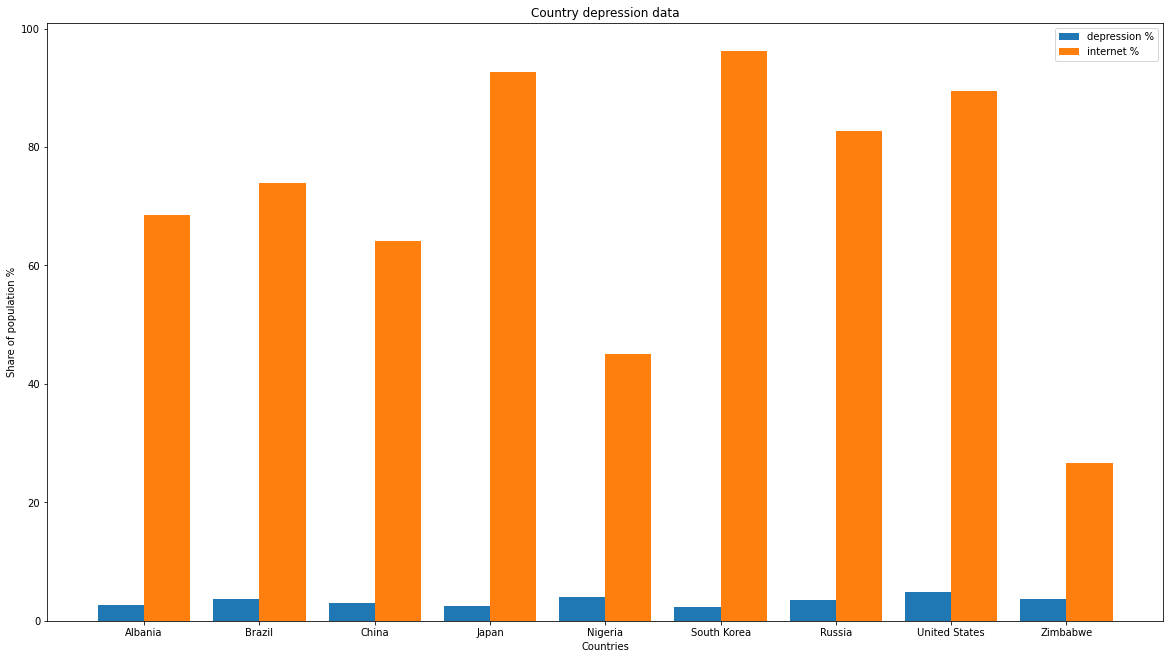

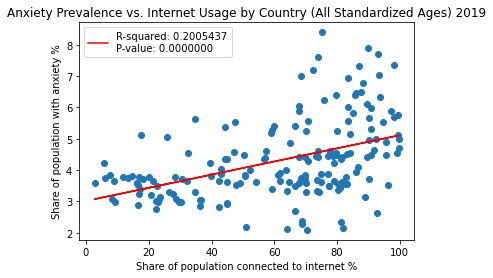

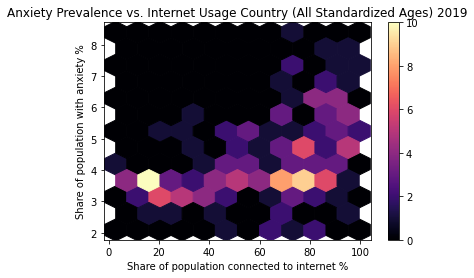

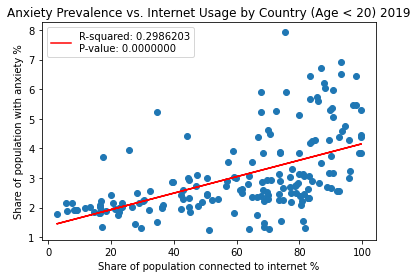

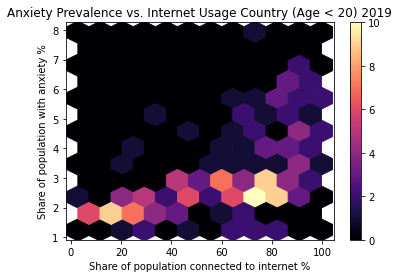

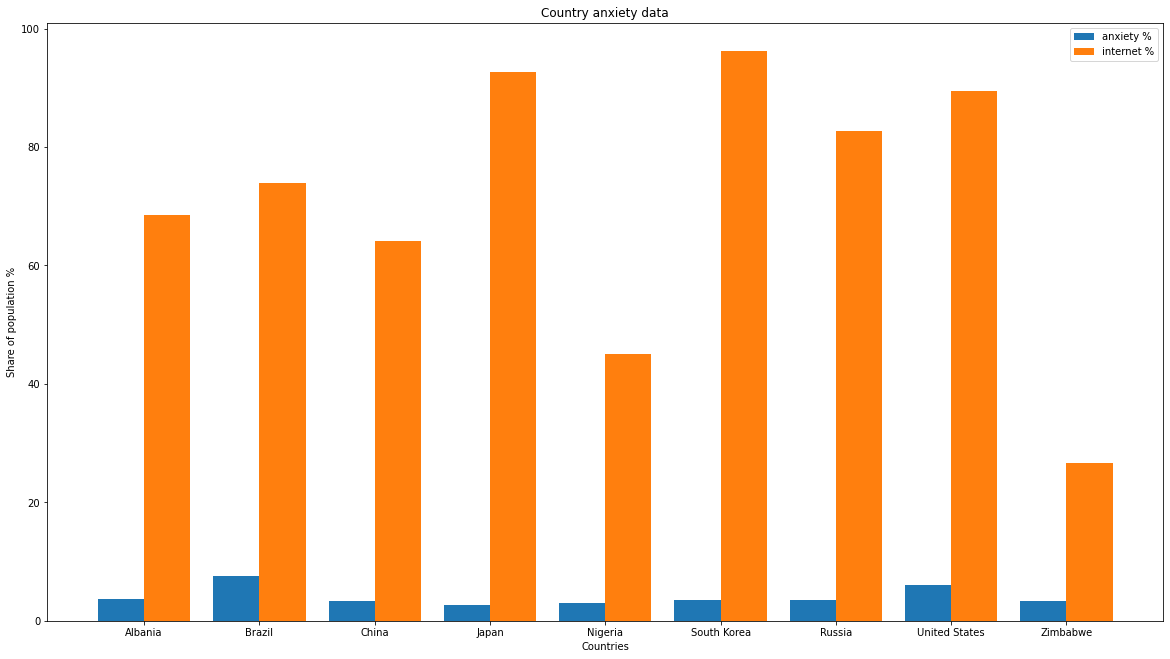

In [4]:
#define filters for use with data_countries
age_youth = data_countries["age"] == "<20 years"
age_all = data_countries["age"] == "Age-standardized"

non_covid = (data_countries["year"] != 2020) & (data_countries["year"] != 2021)

#plot countries
combined_all = pd.merge(data_countries[age_all & non_covid], data_internet, on=["location","year"])
combined_youth = pd.merge(data_countries[age_youth & non_covid], data_internet, on=["location","year"])

#interesting countries to analyze
country_list = [
    "United States",
    "Nigeria",
    "China",
    "Japan",
    "Brazil",
    "Zimbabwe",
    "South Korea",
    "Russia",
    "Albania"
]

select_year = 2019

country_selections_all = combined_all[combined_all["location"].isin(country_list)]
country_selections_all = country_selections_all[country_selections_all["year"] == select_year]
country_selections_youth = combined_youth[combined_youth["location"].isin(country_list)]
country_selections_youth = country_selections_youth[country_selections_youth["year"] == select_year]

#display(combined_all)
##########################DEPRESSION##########################
year_filter = combined_all["year"] == select_year
x = combined_all[year_filter]["internet %"]
y = combined_all[year_filter]["depression %"]
#plot all ages
plt.scatter(x,y)
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Depression Prevalence vs. Internet Usage by Country (All Standardized Ages) " + str(select_year))
#fit models
plot_linear_model(x,y)
plt.legend()
plt.show()
#use a heatmap rather than a scatter plot, due to too many points!
plt.hexbin(x, y, gridsize=11, cmap='magma')
plt.colorbar()
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Depression Prevalence vs. Internet Usage Country (All Standardized Ages) " + str(select_year))
plt.show()

year_filter = combined_youth["year"] == select_year
x = combined_youth[year_filter]["internet %"]
y = combined_youth[year_filter]["depression %"]
#plot all ages
plt.scatter(x,y)
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Depression Prevalence vs. Internet Usage by Country (Age < 20) " + str(select_year))
#fit models
plot_linear_model(x,y)
plt.legend()
plt.show()

plt.hexbin(x, y, gridsize=11, cmap='magma')
plt.colorbar()
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with depression %")
plt.title("Depression Prevalence vs. Internet Usage Country (Age < 20) " + str(select_year))
plt.show()

plt.figure(figsize=(20,11))
x = country_selections_all["location"]
y = country_selections_all["depression %"]
y_2 = country_selections_all["internet %"]
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2,y,0.4,label = "depression %")
plt.bar(X_axis + 0.2,y_2,0.4,label = "internet %")

plt.xticks(X_axis, x)
plt.xlabel("Countries")
plt.ylabel("Share of population %")
plt.title("Country depression data")
plt.legend()

plt.show()

##########################ANXIETY##########################
year_filter = combined_all["year"] == select_year
x = combined_all[year_filter]["internet %"]
y = combined_all[year_filter]["anxiety %"]
#plot all ages
plt.scatter(x,y)
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Anxiety Prevalence vs. Internet Usage by Country (All Standardized Ages) " + str(select_year))
#fit models
plot_linear_model(x,y)
plt.legend()
plt.show()
#use a heatmap rather than a scatter plot, due to too many points!
plt.hexbin(x, y, gridsize=11, cmap='magma')
plt.colorbar()
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Anxiety Prevalence vs. Internet Usage Country (All Standardized Ages) " + str(select_year))
plt.show()

year_filter = combined_youth["year"] == select_year
x = combined_youth[year_filter]["internet %"]
y = combined_youth[year_filter]["anxiety %"]
#plot all ages
plt.scatter(x,y)
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Anxiety Prevalence vs. Internet Usage by Country (Age < 20) " + str(select_year))
#fit models
plot_linear_model(x,y)
plt.legend()
plt.show()

plt.hexbin(x, y, gridsize=11, cmap='magma')
plt.colorbar()
plt.xlabel("Share of population connected to internet %")
plt.ylabel("Share of population with anxiety %")
plt.title("Anxiety Prevalence vs. Internet Usage Country (Age < 20) " + str(select_year))
plt.show()

plt.figure(figsize=(20,11))
x = country_selections_all["location"]
y = country_selections_all["anxiety %"]
y_2 = country_selections_all["internet %"]
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2,y,0.4,label = "anxiety %")
plt.bar(X_axis + 0.2,y_2,0.4,label = "internet %")

plt.xticks(X_axis, x)
plt.xlabel("Countries")
plt.ylabel("Share of population %")
plt.title("Country anxiety data")
plt.legend()

plt.show()


#United States Statistics

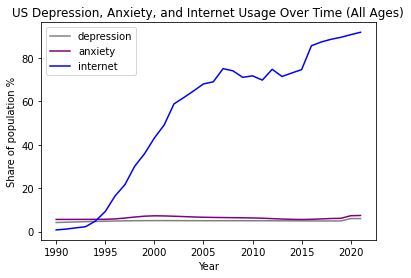

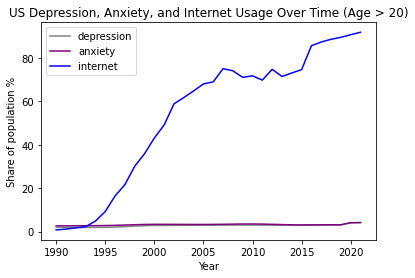

In [5]:
data_us = data_countries[data_countries["location"] == "United States"]
data_us = data_us.merge(data_internet, on=["location","year"])
us_youth = data_us[data_us["age"] == "<20 years"]
us_all = data_us[data_us["age"] == "Age-standardized"]

x = np.arange(1990,2022)
y_1 = us_all["depression %"]
y_2 = us_all["anxiety %"]
y_3 = us_all["internet %"]

plt.plot(x,y_1, label = "depression", color = "gray")
plt.plot(x,y_2, label = "anxiety", color = "purple")
plt.plot(x,y_3, label = "internet", color = "blue")

plt.title("US Depression, Anxiety, and Internet Usage Over Time (All Ages)")
plt.xlabel("Year")
plt.ylabel("Share of population %")

plt.legend()
plt.show()

y_1 = us_youth["depression %"]
y_2 = us_youth["anxiety %"]
y_3 = us_youth["internet %"]
plt.plot(x,y_1, label = "depression", color = "gray")
plt.plot(x,y_2, label = "anxiety", color = "purple")
plt.plot(x,y_3, label = "internet", color = "blue")

plt.title("US Depression, Anxiety, and Internet Usage Over Time (Age > 20)")
plt.xlabel("Year")
plt.ylabel("Share of population %")

plt.legend()
plt.show()


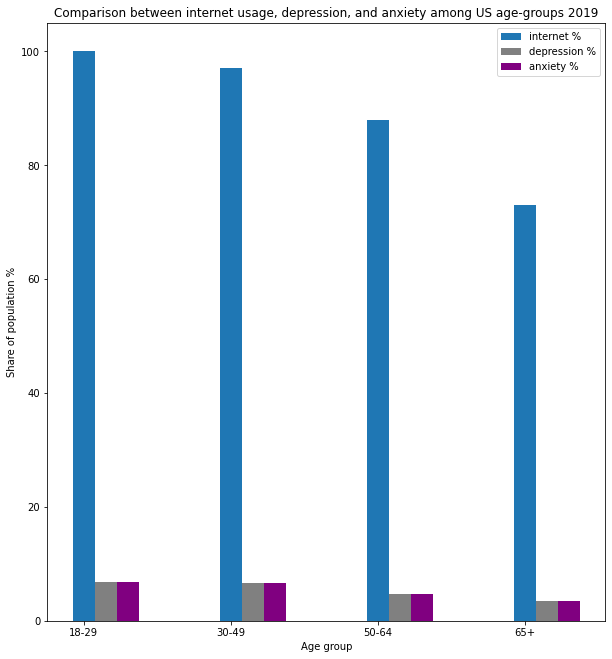

In [6]:
us_internet_data = us_data['US Internet']
us_depression_data = us_data['US Depression']
us_anxiety_data = us_data['US Anxiety']

year_select = 2019

us_internet_data = us_internet_data[us_internet_data["year"] == year_select]
us_depression_data = us_depression_data[us_depression_data["year"] == year_select]
us_anxiety_data = us_anxiety_data[us_anxiety_data["year"] == year_select]

us_internet_data = us_internet_data.drop(columns=["year"])
us_depression_data = us_depression_data.drop(columns=["year"])
us_anxiety_data = us_anxiety_data.drop(columns=["year"])


plt.figure(figsize=(10,11))
width = 0.15

x = us_internet_data.columns
y = us_internet_data.iloc[0]
y_2 = us_depression_data.iloc[0]
y_3 = us_anxiety_data.iloc[0]
X_axis = np.arange(len(x))

plt.bar(X_axis,y,width=width,label = "internet %")
plt.bar(X_axis + width,y_2,width,label = "depression %", color = "gray")
plt.bar(X_axis + width*2,y_2,width,label = "anxiety %", color = "purple")

plt.xticks(X_axis, x)
plt.xlabel("Age group")
plt.ylabel("Share of population %")
plt.title("Comparison between internet usage, depression, and anxiety among US age-groups " + str(year_select))
plt.legend()

plt.show()
